## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [3]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
# Carregar o dataset (supondo que você já tem o arquivo e o dataframe)
data = pd.read_csv('housing.csv')

# Evitar o uso de inplace=True com chained assignment
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

# Converter variáveis categóricas em dummies
data = pd.get_dummies(data)

data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

In [6]:
# Definir as features e a variável alvo (target)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Criando uma Árvore de Regressão com Profundidade máxima 5 e Mínimo de Amostras por Folha de 15.
regr = DecisionTreeRegressor(max_depth=4, min_samples_leaf=14)

# Treinando o modelo com 'X_train' e 'y_train'.
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=14)

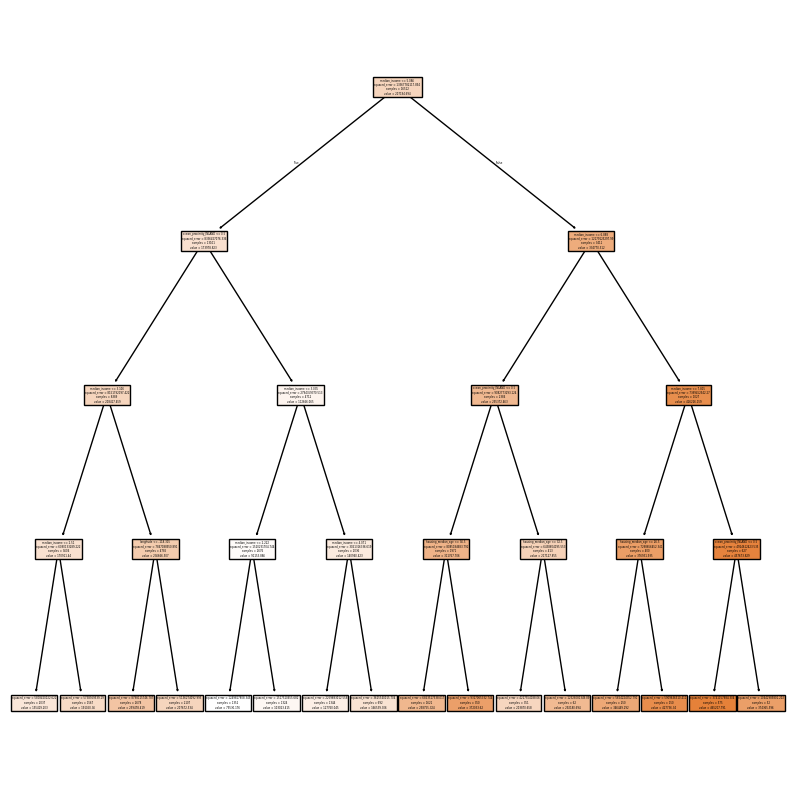

In [8]:
# Tamanho da Figura.
plt.rc('figure', figsize=(10,10))

# Plotando a Árvore de Regressão através do tree.plot_tree().
tree.plot_tree(regr, # Árvore utilizada.
               feature_names=list(X_train.columns), # nome das Colunas.
               filled=True) # Colorir a árvore.

plt.savefig("Arvore_regr1.jpg") # Salvando a imagem.

plt.show() # Exibir a árvore.

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [10]:
# Realizando a Pós-Poda, identificando 'ccp_alphas' e 'impurities'.
path = regr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
path

{'ccp_alphas': array([0.00000000e+00, 2.23596328e+07, 2.38330272e+07, 2.48868077e+07,
        3.75158077e+07, 4.16032220e+07, 6.80981662e+07, 9.36085402e+07,
        9.64173693e+07, 1.73573235e+08, 1.85216145e+08, 1.91668916e+08,
        5.38288744e+08, 7.44333012e+08, 1.67533461e+09, 4.23754184e+09]),
 'impurities': array([5.21350305e+09, 5.23586268e+09, 5.25969571e+09, 5.28458252e+09,
        5.32209832e+09, 5.36370155e+09, 5.43179971e+09, 5.52540825e+09,
        5.62182562e+09, 5.79539886e+09, 5.98061500e+09, 6.17228392e+09,
        6.71057266e+09, 7.45490567e+09, 9.13024028e+09, 1.33677821e+10])}

Text(0, 0.5, 'Impureza total das folhas')

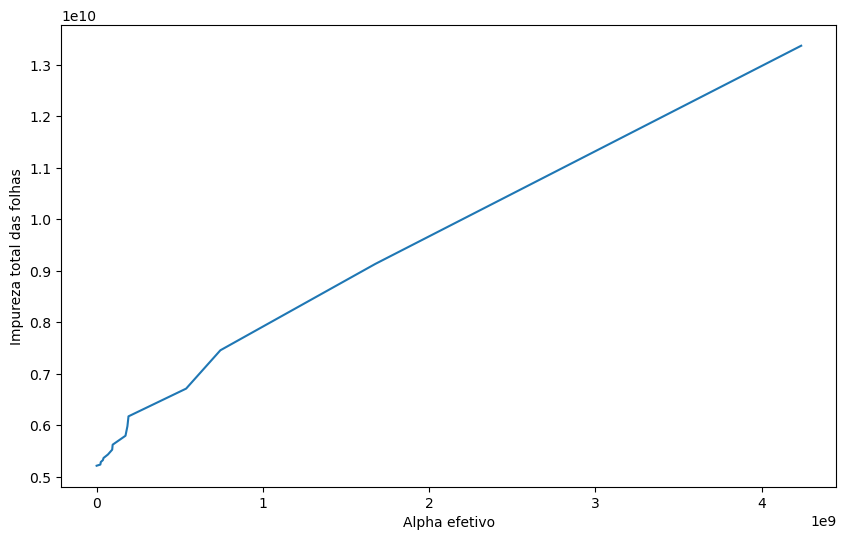

In [11]:
# Tamanho da Figura.
plt.figure(figsize=(10,6))

# Gráfico 'ccp_alphas' x 'impurities'
plt.plot(ccp_alphas,impurities) # Plotagem do gráfico.
plt.xlabel("Alpha efetivo") # Nomeando label x.
plt.ylabel("Impureza total das folhas") # Nomeando label y.

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [13]:

# Criando lista para inserir os clfs.
clfs = []

# Utilizando loop 'for' para recolher os clfs.
for ccp_alpha in ccp_alphas: # buscar ccp_alpha de cada ccp_alphas.
    clf = DecisionTreeRegressor(random_state=123, ccp_alpha=ccp_alpha) # Criando árvore para cada ccp_alpha.
    clf.fit(X_train, y_train) # Treinando a árvore.
    clfs.append(clf) # Inserindo clf dentro da lista clfs.

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse_train = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
mse_test  = [mean_squared_error(y_test , clf.predict(X_test )) for clf in clfs]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

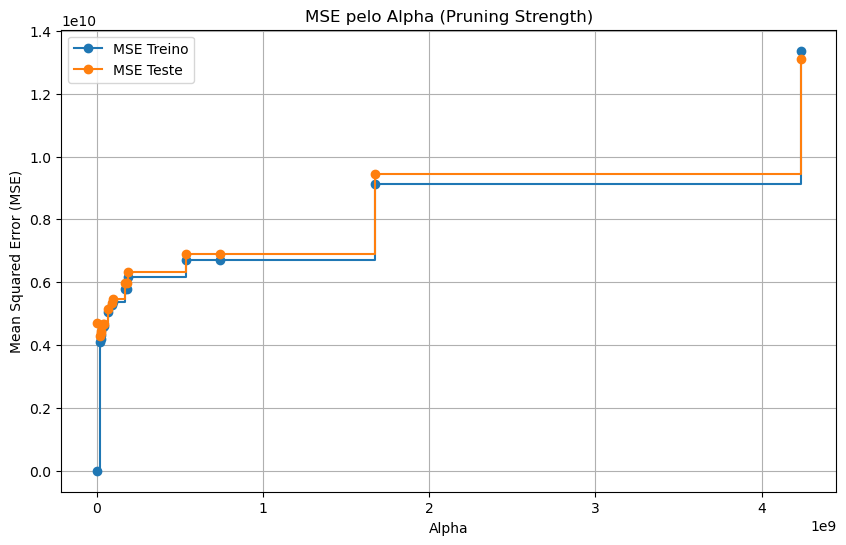

In [17]:
# Plotando os MSEs
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_train, label='MSE Treino', marker='o', drawstyle="steps-post")
plt.plot(ccp_alphas, mse_test, label='MSE Teste', marker='o', drawstyle="steps-post")
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE pelo Alpha (Pruning Strength)')
plt.legend()
plt.grid(True)
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [19]:
# Selecionando o valor de alpha que minimiza o MSE no conjunto de teste
best_alpha_index = mse_test.index(min(mse_test))
best_alpha = ccp_alphas[best_alpha_index]

# Treinando a árvore de decisão com o melhor alpha
best_clf = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
best_clf.fit(X_train, y_train)

# Calculando o R^2 no conjunto de treino e teste
r2_train = best_clf.score(X_train, y_train)
r2_test = best_clf.score(X_test, y_test)

print(f"Melhor alpha: {best_alpha}")
print(f"R² no treino: {r2_train:.4f}")
print(f"R² no teste: {r2_test:.4f}")


Melhor alpha: 22359632.805764377
R² no treino: 0.6938
R² no teste: 0.6725


### 7. Visualize esta árvore.

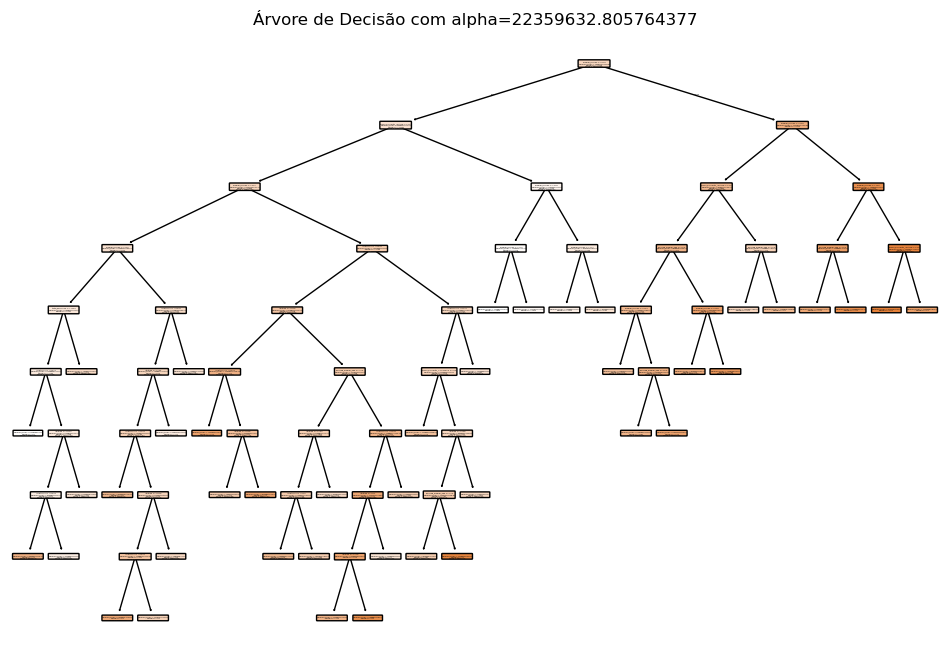

In [21]:
from sklearn.tree import plot_tree
# Visualizando a árvore treinada com o melhor alpha
plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, rounded=True, feature_names=X.columns, precision=2)
plt.title(f"Árvore de Decisão com alpha={best_alpha}")
plt.show()